Anzahl der Daten im Datensatz: 106
Verteilung der Labels im gesamten Datensatz:
is_phishing
1    55
0    51
Name: count, dtype: int64
Trainingsdaten: 84, Validierungsdaten: 11, Testdaten: 11
Verteilung der Labels im Training:
is_phishing
1    44
0    40
Name: count, dtype: int64
Verteilung der Labels in der Validierung:
is_phishing
1    6
0    5
Name: count, dtype: int64
Verteilung der Labels im Test:
is_phishing
0    6
1    5
Name: count, dtype: int64
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Beste Parameter: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Validation Accuracy: 0.7272727272727273
Validation Precision: 0.8
Validation Recall: 0.6666666666666666
Validation F1-Score: 0.7272727272727273
Validation Log-Loss: 0.47377193162650216
Test Accuracy: 0.8181818181818182
Test Precision: 0.8
Test Recall: 0.8
Test F1-Score: 0.8
Test Log-Loss: 0.4245419584068379


C:\Users\krenn\miniconda3\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


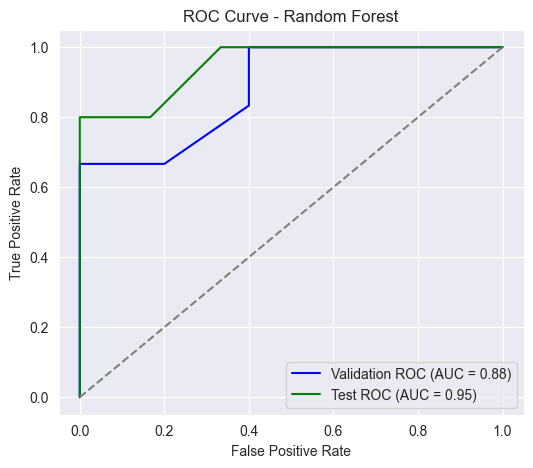

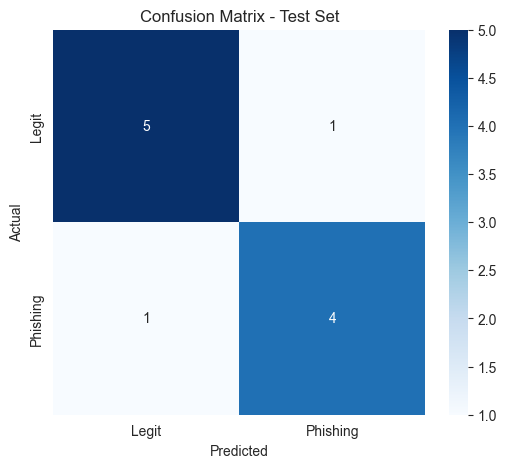

True


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Daten laden.
data = pd.read_csv(r'C:\Users\krenn\PycharmProjects\Phishing_DetectionRF_XGBoost\datasets_phishing\Deduplicated_Sorted_Dataset.csv', delimiter=';')

# Hier wird geschaut, wie viele Daten im Datensatz von oben vorhanden sind + wie viele URLs ins. Phishing / legitim sind.
print(f"Anzahl der Daten im Datensatz: {data.shape[0]}")
print(f"Verteilung der Labels im gesamten Datensatz:\n{data['is_phishing'].value_counts()}")

# Hier wird in Training, Validierung und Test-Daten aufgeteilt
train, temp = train_test_split(data, test_size=0.2, random_state=42, stratify=data['is_phishing'])
val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['is_phishing'])

# Debugging: Überprüfung der Größen der Datensätze
print(f"Trainingsdaten: {len(train)}, Validierungsdaten: {len(val)}, Testdaten: {len(test)}")
print(f"Verteilung der Labels im Training:\n{train['is_phishing'].value_counts()}")
print(f"Verteilung der Labels in der Validierung:\n{val['is_phishing'].value_counts()}")
print(f"Verteilung der Labels im Test:\n{test['is_phishing'].value_counts()}")

# Aufteilen der Daten in Features (X) und Ziel (y)
X_train = train.drop(columns=['is_phishing', 'url'])
y_train = train['is_phishing']
X_val = val.drop(columns=['is_phishing', 'url'])
y_val = val['is_phishing']
X_test = test.drop(columns=['is_phishing', 'url'])
y_test = test['is_phishing']

# Random Forest Modell und GridSearchCV
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# GridSearchCV initialisieren
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='accuracy', cv=3, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Beste Parameter anzeigen
print(f"Beste Parameter: {grid_search_rf.best_params_}")

# Modell mit den besten Parametern trainieren
best_rf_model = grid_search_rf.best_estimator_

# Vorhersage für das Validierungsset
y_val_pred_rf = best_rf_model.predict(X_val)
y_val_proba_rf = best_rf_model.predict_proba(X_val)[:, 1]

# Berechnung der Metriken für Validierung
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
precision_val_rf = precision_score(y_val, y_val_pred_rf)
recall_val_rf = recall_score(y_val, y_val_pred_rf)
f1_val_rf = f1_score(y_val, y_val_pred_rf)
log_loss_val_rf = log_loss(y_val, best_rf_model.predict_proba(X_val))

print(f"Validation Accuracy: {accuracy_val_rf}")
print(f"Validation Precision: {precision_val_rf}")
print(f"Validation Recall: {recall_val_rf}")
print(f"Validation F1-Score: {f1_val_rf}")
print(f"Validation Log-Loss: {log_loss_val_rf}")

# ROC-Kurve für Validierung
fpr_val_rf, tpr_val_rf, _ = roc_curve(y_val, y_val_proba_rf)
auc_val_rf = auc(fpr_val_rf, tpr_val_rf)

# Vorhersage für das Testset
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Berechnung der Metriken für Test
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)
log_loss_test_rf = log_loss(y_test, best_rf_model.predict_proba(X_test))

print(f"Test Accuracy: {accuracy_test_rf}")
print(f"Test Precision: {precision_test_rf}")
print(f"Test Recall: {recall_test_rf}")
print(f"Test F1-Score: {f1_test_rf}")
print(f"Test Log-Loss: {log_loss_test_rf}")

# ROC-Kurve für Test
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_proba_rf)
auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

# Visualisierung der ROC-Kurve
plt.figure(figsize=(6, 5))
plt.plot(fpr_val_rf, tpr_val_rf, label=f'Validation ROC (AUC = {auc_val_rf:.2f})', color='blue')
plt.plot(fpr_test_rf, tpr_test_rf, label=f'Test ROC (AUC = {auc_test_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Konfusionsmatrix für Test
plt.figure(figsize=(6, 5))
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Test Set')
plt.show()

print(grid_search_rf.refit)
